In [100]:
import numpy as np
import pandas as pd
import json
import sys
import os
import matplotlib
# matplotlib.use('Agg') 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
import pdb
#import ipdb
import h5py
import importlib
import pickle
import math

# Add root folder to sys path
sys.path.append("../")

from load_expert_traj import recursively_save_dict_contents_to_group

# %pylab inline
# inline doesn't give interactive plots
# %matplotlib inline 
# %matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'Blues'

sns.set()

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# %load_ext autoreload
# %autoreload 2

# Import own modules
# Need to use importlib since module starts with a numerical value.

In [101]:
def draw_circle(centre, omega, r, direction=1, T = 120, theta_offset = 0):
    c_x = centre[0]
    c_y = centre[1]
    theta_offset = math.radians(theta_offset)
    
    list_of_points = []
    
    old_x = c_x + r * math.cos(theta_offset)
    old_y = c_y + r * math.sin(theta_offset)
    list_of_points.append((old_x, old_y))
    
    for t in range(1, T):
        theta = math.radians(omega * t * direction)
        new_x = c_x + r * math.cos(theta + theta_offset)
        new_y = c_y + r * math.sin(theta + theta_offset)
        
        del_x = new_x - old_x # normalize these to unit vectors to get actions
        del_y = new_y - old_y
        
        old_x = new_x
        old_y = new_y
        list_of_points.append((old_x, old_y))
        
    return list_of_points       

In [102]:

def draw_trajectory_for_two_half_circles(r1=2.5, r2=2.5, direction1=1, direction2=-1, plot=True):
    centre1 = (-2.5, 0.0)
    w1, T1 = 3 , 60
    circle_1 = draw_circle(centre = centre1, omega = w1, r = r1, direction=direction1, T = T1, theta_offset = 180)

    # centre2 = (0.0, -(r1+r2))
    # centre2 = (circle_1[0][0], circle_1[0][1] + r2)
    centre2 = (2.5, 0.0)
    w2, T2 = 3, 60
    circle_2 = draw_circle(centre = centre2, omega = w2, r = r2, direction=direction2, T = T2, theta_offset = 180)
    
    x_list = []
    y_list = []
    for i in range(len(circle_1)):
        x_list.append(circle_1[i][0])
        y_list.append(circle_1[i][1])
    shift_x = circle_2[0][0] - x_list[-1]
    shift_y = circle_2[0][1] - y_list[-1]
    
    for i in range(1, len(circle_2)):
        x_list.append(circle_2[i][0] - shift_x)
        y_list.append(circle_2[i][1] - shift_y)
    
    if plot:
        colors = cm.rainbow(np.linspace(0, 1, len(x_list)))
        plt.scatter(x_list, y_list, color=colors, s=8) 
        plt.axis('equal')    
        plt.title("Policy 1: R1: {:.2f}, R2: {:2f}".format(r1, r2))

    return x_list, y_list

def draw_trajectory_for_one_circle(r=5.0, direction=1, plot=True, center=(0.0,0.0), sel_func=None):
    centre1 = center
    w1, T1 = 1.5 , 120
    circle_1 = draw_circle(centre = centre1, omega = w1, r = r, direction=direction, T = T1, theta_offset = 180)
    
    x_list = []
    y_list = []
    if sel_func is None:
        for i in range(len(circle_1)):
            x_list.append(circle_1[i][0])
            y_list.append(circle_1[i][1])
    elif sel_func == 'up':
        for i in range(len(circle_1)):
            if circle_1[i][1] > 0.:
                x_list.append(circle_1[i][0])
                y_list.append(circle_1[i][1])
    elif sel_func == 'down':
        for i in range(len(circle_1)):
            if circle_1[i][1] < 0.:
                x_list.append(circle_1[i][0])
                y_list.append(circle_1[i][1])

    if plot:
        colors = cm.rainbow(np.linspace(0, 1, len(x_list)))
        plt.scatter(x_list, y_list, color=colors, s=8) 
        plt.axis('equal')    
        plt.title("Policy 2: R: {:.2f}".format(r))

    return x_list, y_list



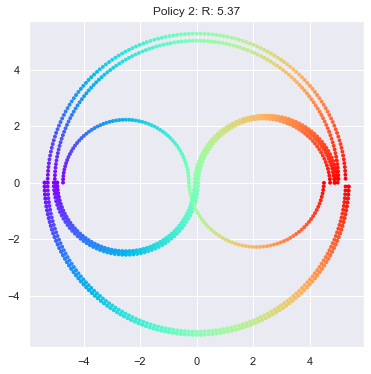

{'0_p1_2.44_2.39': {'state': array([[-4.94198563e+00,  2.99056989e-16],
       [-4.93863898e+00, -1.27803653e-01],
       [-4.92860818e+00, -2.55257006e-01],
       [-4.91192074e+00, -3.82010716e-01],
       [-4.88862239e+00, -5.07717362e-01],
       [-4.85877699e+00, -6.32032390e-01],
       [-4.82246635e+00, -7.54615061e-01],
       [-4.77978999e+00, -8.75129385e-01],
       [-4.73086488e+00, -9.93245039e-01],
       [-4.67582513e+00, -1.10863828e+00],
       [-4.61482159e+00, -1.22099282e+00],
       [-4.54802148e+00, -1.33000070e+00],
       [-4.47560788e+00, -1.43536314e+00],
       [-4.39777927e+00, -1.53679135e+00],
       [-4.31474899e+00, -1.63400733e+00],
       [-4.22674460e+00, -1.72674460e+00],
       [-4.13400733e+00, -1.81474899e+00],
       [-4.03679135e+00, -1.89777927e+00],
       [-3.93536314e+00, -1.97560788e+00],
       [-3.83000070e+00, -2.04802148e+00],
       [-3.72099282e+00, -2.11482159e+00],
       [-3.60863828e+00, -2.17582513e+00],
       [-3.49324504e+00, 

In [103]:
def get_state_action_from_positions(pos_x_list, pos_y_list):
    # states are (x, y) actions are (delta_x, delta_y)
    states, actions = [], []
    for i in range(len(pos_x_list)):
        states.append((pos_x_list[i], pos_y_list[i]))
    for i in range(1, len(states)):
        a0 = states[i][0] - states[i-1][0]
        a1 = states[i][1] - states[i-1][1]
        a = [a0, a1] / np.linalg.norm([a0, a1])
        actions.append(a)
    # Remove the last state
    return states[:-1], actions

def save_expert_traj_dict_to_h5(traj_data_dict, save_dir,
                               h5_filename='expert_traj.h5'):
     h5_f = h5py.File(os.path.join(save_dir, h5_filename), 'w')
     recursively_save_dict_contents_to_group(h5_f, '/', traj_data_dict)
     h5_f.flush()
     h5_f.close()
     print("Did save data to {}".format(os.path.join(save_dir, h5_filename)))

# Get trajectories for policy 1 (10 trajectories)
num_traj = 5
r1_arr = np.random.normal(2.5, 0.1, 10)
r2_arr = np.random.normal(2.5, 0.1, 10)
direction = [1, -1]
# r3_arr = np.random.normal(2, 0.5, 10)

env_data_dict = {'num_goals': 2, 'num_actions': 2}
expert_data_dict = {}
for i in range(num_traj):
    r1 = np.random.choice(r1_arr)
    r2 = np.random.choice(r2_arr)
    direction_1 = np.random.choice([1, -1])
    direction[0] = direction_1
    direction[1] = -direction_1 # opposite circles 
    # r2, r3 = r1, r1
    # r2 = np.random.choice(r2_arr)
    # r3 = np.random.choice(r3_arr)
    states_x, states_y = draw_trajectory_for_two_half_circles(
        r1=r1, r2=r2, direction1=direction[0], direction2=direction[1], plot=True)
    states, actions = get_state_action_from_positions(states_x, states_y)
    key = '{}_p1_{:.2f}_{:.2f}'.format(i, r1, r2)
    expert_data_dict[key] = {}
    expert_data_dict[key]['state'] = np.array(states)
    expert_data_dict[key]['action'] = np.array(actions)
    expert_data_dict[key]['goal'] = np.ones(len(states)) * 0
    expert_data_dict[key]['radius'] = np.array([r1, r2])

# generate trajectories for one_circle
r_arr = np.random.normal(5.0, 0.2, 10)
for i in range(num_traj):
    r = np.random.choice(r_arr)
    direction = np.random.choice([1, -1])
    # direction = 1
    # r2, r3 = r1, r1
    # r2 = np.random.choice(r2_arr)
    # r3 = np.random.choice(r3_arr)
    states_x, states_y = draw_trajectory_for_one_circle(
        r=r, direction=direction, plot=True)
    states, actions = get_state_action_from_positions(states_x, states_y)
    key = '{}_p2_{:.2f}'.format(i, r)
    expert_data_dict[key] = {}
    expert_data_dict[key]['state'] = np.array(states)
    expert_data_dict[key]['action'] = np.array(actions)
    expert_data_dict[key]['goal'] = np.ones(len(states)) * 1
    expert_data_dict[key]['radius'] = np.array([r])

# r_arr = np.random.normal(math.sqrt(41), 0.1, 10)
# for i in range(num_traj):
#     r = np.random.choice(r_arr)
#     # direction = np.random.choice([1, -1])
#     direction = 1
#     # r2, r3 = r1, r1
#     # r2 = np.random.choice(r2_arr)
#     # r3 = np.random.choice(r3_arr)
#     states_x, states_y = draw_trajectory_for_one_circle(
#         r=r, direction=direction, plot=True,center=(0.0,4.0), sel_func='down')
#     states, actions = get_state_action_from_positions(states_x, states_y)
#     key = '{}_p2_{:.2f}'.format(i, r)
#     expert_data_dict[key] = {}
#     expert_data_dict[key]['state'] = np.array(states)
#     expert_data_dict[key]['action'] = np.array(actions)
#     expert_data_dict[key]['goal'] = np.ones(len(states)) * 1
#     expert_data_dict[key]['radius'] = np.array([r])

plt.savefig('circle.png')
plt.show()


data_to_save = {
    'expert_traj': expert_data_dict,
    'obstacles': np.array([]),
    'set_diff': np.array([]),
    'env_data': env_data_dict,
}
print(expert_data_dict)
SAVE_DATA = True
if SAVE_DATA:
    import os
    save_dir = f'../h5_trajs/circle_trajs/meta_1234_traj_{2 * num_traj}_circles'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    save_expert_traj_dict_to_h5(data_to_save, save_dir)